### K - Means Clustering
1. Unsupervised Machine Learning
2. Main goal is to group similar data together
3. Data is unlabelled(No Target Feature)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = ['ID','Gender','Age','Income','SpendScore']

In [5]:
df

,ID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   SpendScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.shape

(200, 5)

In [8]:
df.isna().sum()

ID            0
Gender        0
Age           0
Income        0
SpendScore    0
dtype: int64

#### visualize income vs SpendingScore

In [9]:
import seaborn as sns

<Axes: xlabel='Income', ylabel='SpendScore'>

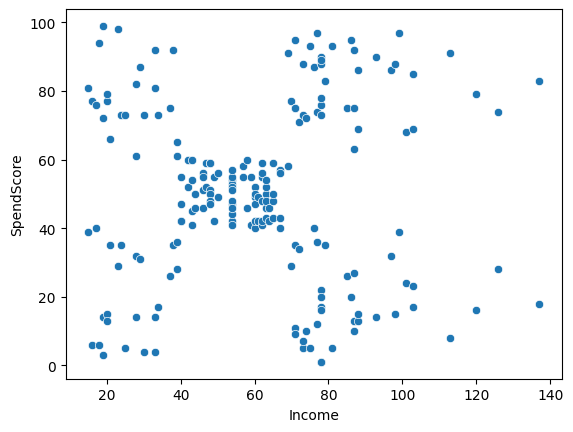

In [10]:
sns.scatterplot(data=df,x='Income',y='SpendScore')

#### Get X Features

In [11]:
X = df[['Income','SpendScore']]
X.head()

,Income,SpendScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Create a Preprocessing Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [13]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])


In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### Apply Elbow Method to ge optimum number of clusters

In [15]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


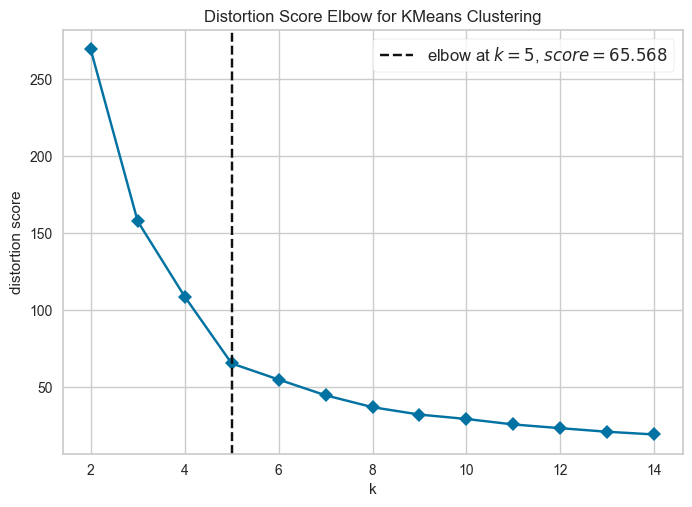

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [17]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.cluster import KMeans
kelbow_visualizer(KMeans(),
                  X_pre,
                  k = (2,15),
                  timings=False)

#### Create K=5 Cluster

In [18]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [19]:
lb = model.labels_
lb

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [20]:
X['Label'] = lb

In [21]:
X

,Income,SpendScore,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


#### Check different Labels

In [22]:
X[X['Label']==0] # Low Income High Spend

,Income,SpendScore,Label
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [23]:
X[X['Label']==1]  # High Income Low Spend

,Income,SpendScore,Label
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [24]:
X[X['Label']==2] # High income High Spend

,Income,SpendScore,Label
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [25]:
X[X['Label']==3] # Medium income Medium Sprnding

,Income,SpendScore,Label
43,39,61,3
46,40,55,3
47,40,47,3
48,40,42,3
49,40,42,3
...,...,...,...
121,67,40,3
122,69,58,3
126,71,35,3
132,72,34,3


In [26]:
X[X['Label']==4] # Low Income Low Spend

,Income,SpendScore,Label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


#### Visualize the Clusters

<Axes: xlabel='Income', ylabel='SpendScore'>

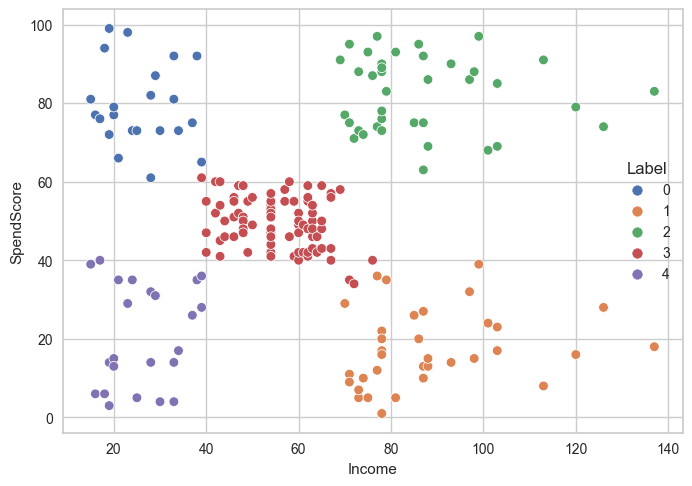

In [27]:
sns.scatterplot(data=X,x='Income',y='SpendScore',hue='Label',palette='deep')

#### Clustring on basis of Age,Income,SpendScore

In [28]:
X = df[['Age','Income','SpendScore']]
X

,Age,Income,SpendScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [29]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [30]:
X_pre = num_pipe2.fit_transform(X)
X_pre

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

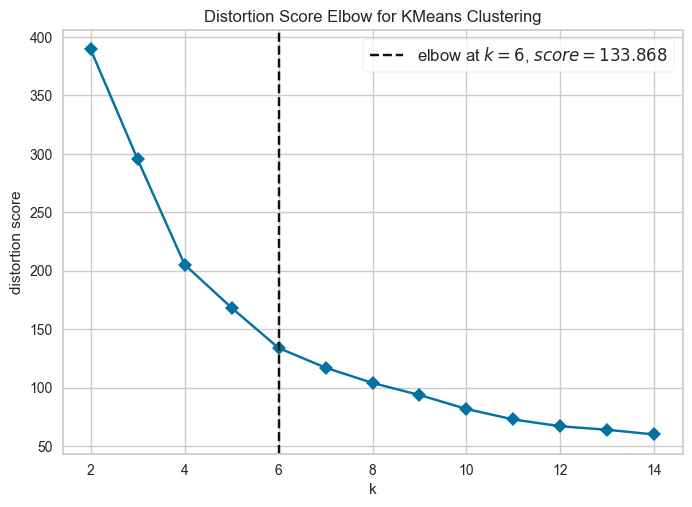

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [31]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

In [32]:
model2 = KMeans(n_clusters=6)
model2.fit(X_pre)

KMeans(n_clusters=6)

In [33]:
lb2 = model2.labels_
lb2

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 4, 1,
       4, 5, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [34]:
X['Label']=lb2

In [35]:
X

,Age,Income,SpendScore,Label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


In [36]:
for i in range(6):
    print(f'Label : {i} \n')
    display(X[X['Label']==i])
    print('\n========================================\n')

Label : 0 



,Age,Income,SpendScore,Label
126,43,71,35,0
128,59,71,11,0
130,47,71,9,0
134,20,73,5,0
136,44,73,7,0
140,57,75,5,0
144,25,77,12,0
146,48,77,36,0
148,34,78,22,0
150,43,78,17,0




Label : 1 



,Age,Income,SpendScore,Label
43,31,39,61,1
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1




Label : 2 



,Age,Income,SpendScore,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Label : 3 



,Age,Income,SpendScore,Label
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3




Label : 4 



,Age,Income,SpendScore,Label
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Label : 5 



,Age,Income,SpendScore,Label
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


#### Visualize 3D data

In [39]:
%pip install plotly nbformat

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/2b/ff/af59fd34bc4d7ac3e6e0cd1f3c10317d329b6c1aee179e8b24ad9a79fbac/jsonschema-4.19.0-py3-none-any.whl.metadata
  Using cached jsonschema-4.19.0-py3-none-any.whl.metadata (8.2 kB)
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/1c/24/83349ac2189cc2435e84da3f69ba3c97314d3c0622628e55171c6798ed80/jsonschema_specifications-2023.7.1-py3-none-any.whl.metadata
  Using cached jsonschema_specifications-2023.7.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
Using cached jsonschema-4.19.0-py3-none-any.whl (83 kB)
Using cached

In [40]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X, x='Age', y='Income', z='SpendScore', color='Label')
fig.show()

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/26/5d/1e13b597ed8e54803e9ac6ded18c04cd35d8cbc49016778ec50c4ca9e9d5/plotly-5.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for fastjsonschema from https://files.pythonhosted.org/packages/9d/93/a3ca3cdeb84065d7d8f8df4cb09ab44405f109183c1d2b915ec17574e6b1/fastjsonschema-2.18.0-py3-none-any.whl.metadata
  Using cached fastjsonschema-2.18.0-py3-none-any.whl.metadata (2.0 kB)
  Obtaining dependency information for